In [1]:
# main libraries
import pandas as pd
import numpy as np
import time

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# In this notebook, we will be using the binary encoded training and test data based on our observations after performing Random Forest Classification

In [2]:
df_train = pd.read_csv('binary_SMOTE_train.csv', index_col = 'Unnamed: 0')
df_test = pd.read_csv('test_binary.csv', index_col = 'Unnamed: 0')

In [3]:
df_train.head()

,amt,city_pop,time,distance,cc_num_0,cc_num_1,cc_num_2,cc_num_3,cc_num_4,cc_num_5,...,identifiers_1,identifiers_2,identifiers_3,identifiers_4,identifiers_5,identifiers_6,identifiers_7,identifiers_8,identifiers_9,is_fraud
0,60.85,276002,1.560192,69.034830,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,80.29,116001,1.587067,106.847670,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,1,0
2,76.72,493,1.554160,53.404865,0,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,0
3,53.58,76,1.572842,95.372180,0,0,1,1,1,0,...,0,1,1,1,0,0,0,1,1,0
4,52.99,498,1.592052,89.384020,0,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,0


In [7]:
#counting total nulls within the dataset
df_train.isnull().sum().sum()

0

In [9]:
All = df_train.shape[0]
fraud = df_train[df_train['is_fraud'] == 1]
nonFraud = df_train[df_train['is_fraud'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 50.0 %
non frauds : 50.0 %


Text(0, 0.5, 'Frequency')

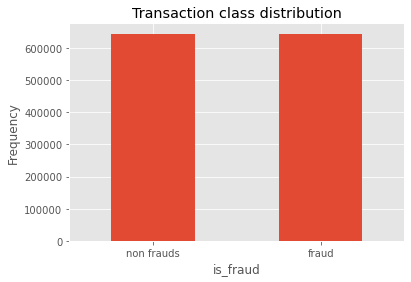

In [10]:
labels = ['non frauds','fraud']
classes = pd.value_counts(df_train['is_fraud'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("is_fraud")
plt.ylabel("Frequency")

In [25]:
X_train = df_train.drop(columns = 'is_fraud')
X_test = df_test.drop(columns = 'is_fraud')
y_train = df_train['is_fraud']
y_test = df_test['is_fraud']

In [26]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [27]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

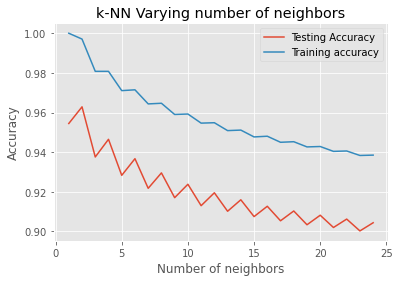

In [28]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [30]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [31]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(knn, filename)

['finalized_model.sav']

In [34]:
# load the model from disk
knn = joblib.load(filename)

In [35]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

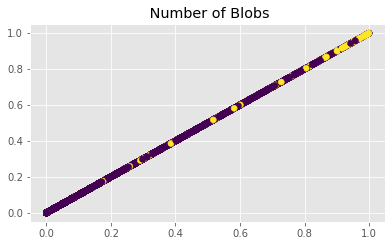

In [36]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 0], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [37]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [38]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.9628697905419996
Precison --> 0.06019047619047619
Recall --> 0.5846438482886216
F1 --> 0.10914428805802606
MCC --> 0.1792262667990546
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    276779
           1       0.06      0.58      0.11      1081

    accuracy                           0.96    277860
   macro avg       0.53      0.77      0.55    277860
weighted avg       0.99      0.96      0.98    277860



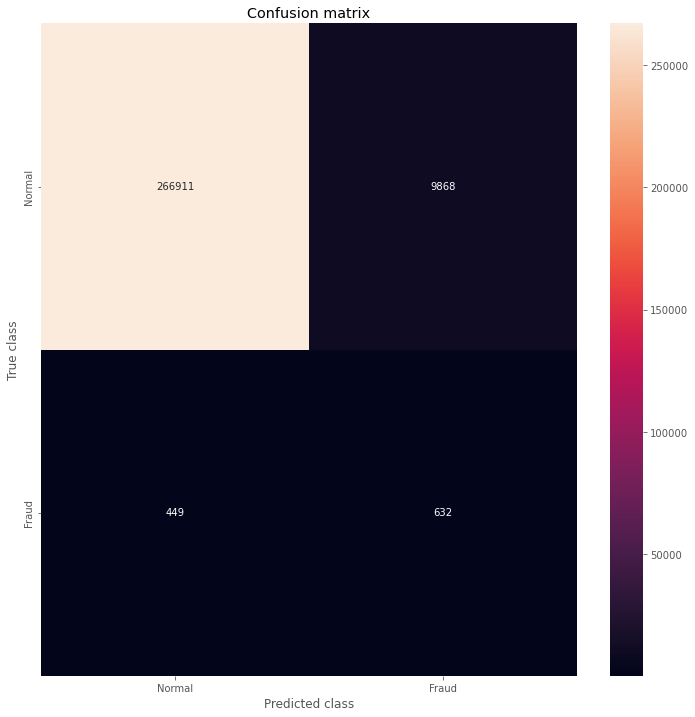

In [39]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Due to SMOTE based oversampling, the classification model is highly imprecise and this affects the f1 score when a greater number of neighbours are used